In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv', low_memory=False)


In [49]:
data.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [50]:
data.tail()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE
245954,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,15304,TYS,...,330.15,AA,0.5212,288.38,AA,0.5212,288.38,NaN,NaN,202411541215304TYSTPA


In [51]:
data.describe()


,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [52]:
data.shape

(245955, 23)

In [53]:
data.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable
features = [ 'Year','quarter','citymarketid_1','citymarketid_2','airportid_1','airportid_2','nsmiles','passengers']
target = 'fare'

# Select features and target from the dataset
X = data[features]
y = data[target]

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)


RandomForestRegressor()

**Random Forest**

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2', 'nsmiles', 'passengers']
target = 'fare'

# Select features and target from the dataset
X = data[features]
y = data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)




RandomForestRegressor()

In [55]:
predictions=model.predict(X_test)
print(predictions)

[289.7585 222.2179 173.6293 ... 230.5999 293.7418 280.0691]


In [56]:
print(X_test.shape)
print(predictions.shape)



(49191, 8)
(49191,)


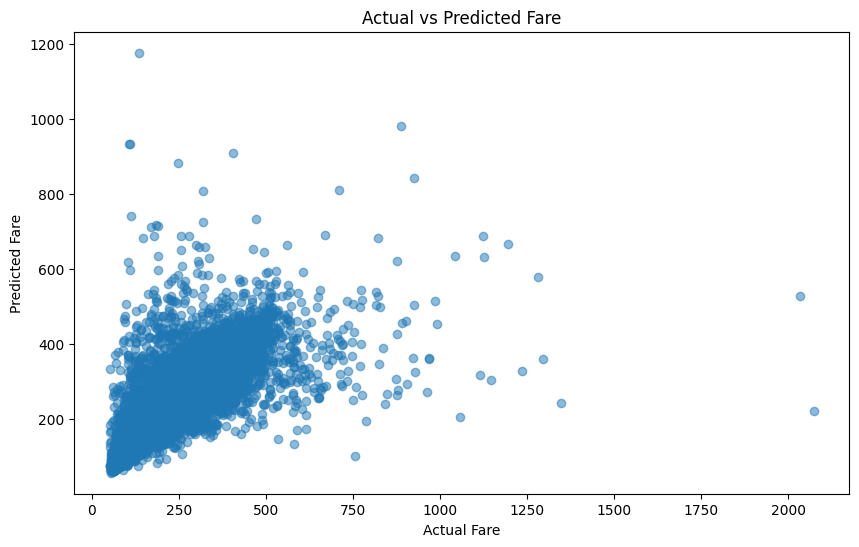

In [57]:
import matplotlib.pyplot as plt

# Make predictions using the test set
predictions = model.predict(X_test)

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.show()


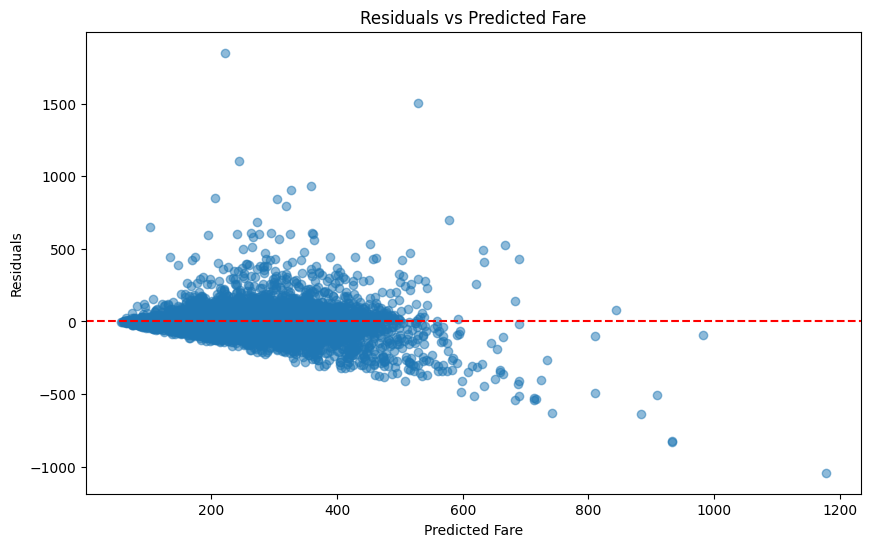

In [58]:
import matplotlib.pyplot as plt

# Make predictions using the test set
predictions = model.predict(X_test)

# Calculate residuals for the test set
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Fare")
plt.show()


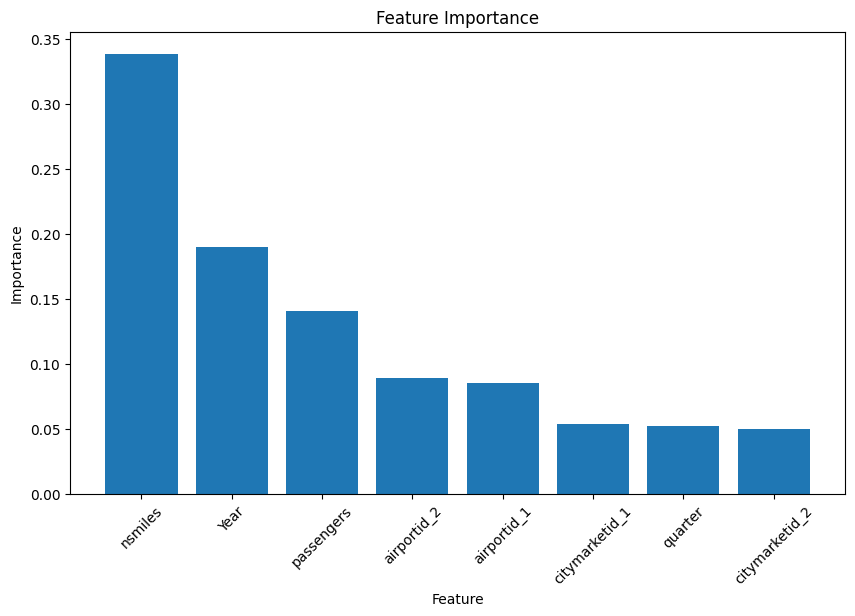

In [59]:

# Fit the model on the training set
model.fit(X_train, y_train)

# Calculate feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
predictions = model.predict(X_test)



# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the scores
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 21.357398892073753
Mean Squared Error (MSE): 1887.8427827030496
Root Mean Squared Error (RMSE): 43.44931279897358
R² Score: 0.7147037313008153


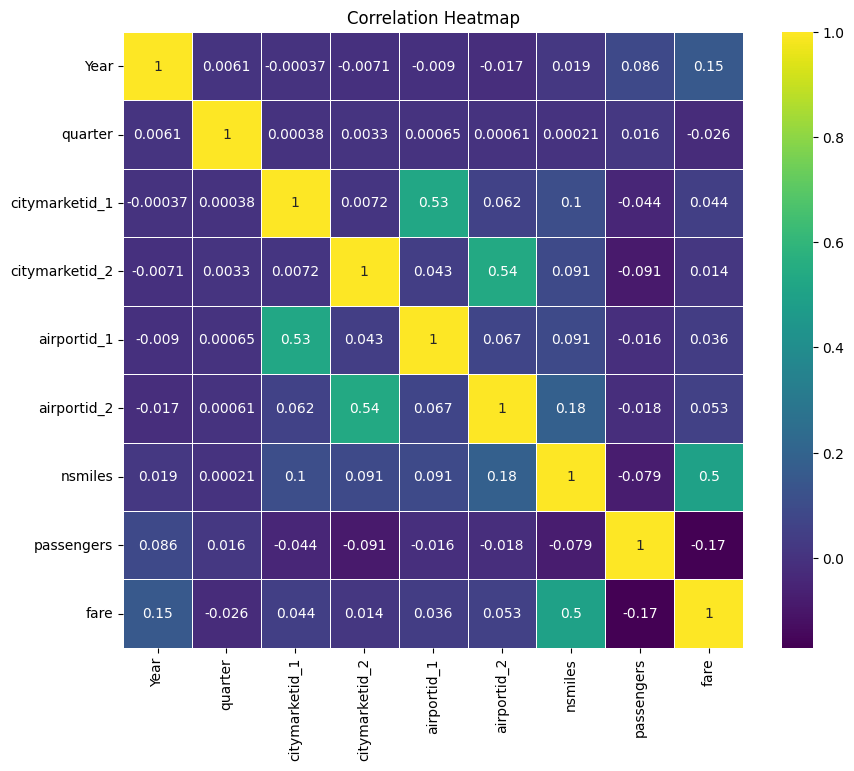

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `corr_matrix` is already defined
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


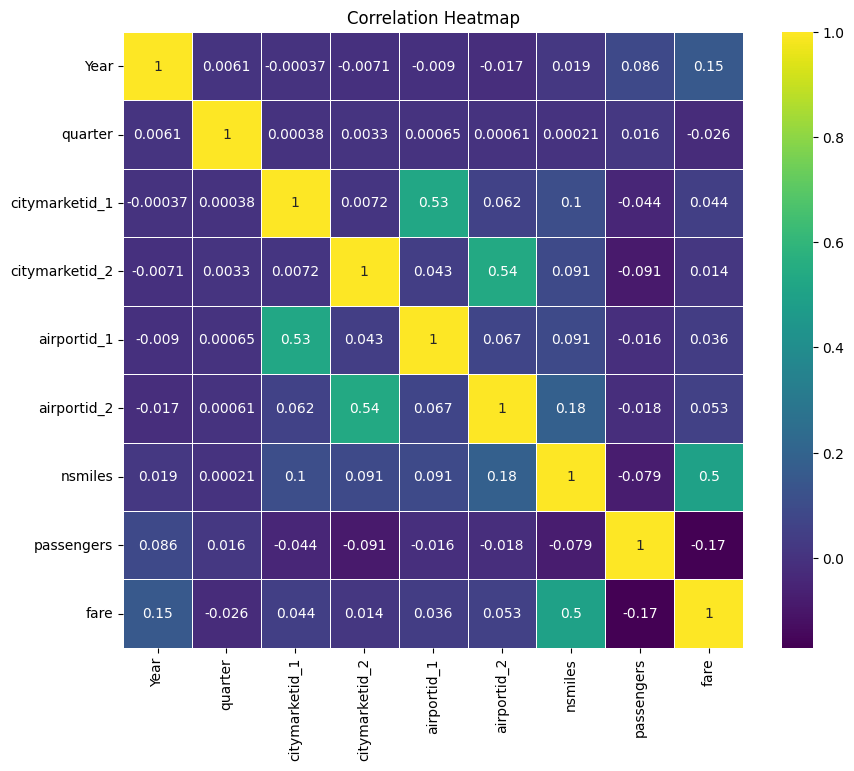

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = data[features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Multiple Regression**

R² Score: 0.29442216012777567
Mean Absolute Error (MAE): 48.6941048321882
Mean Squared Error (MSE): 4787.485934601535
Root Mean Squared Error (RMSE): 69.19166087471477


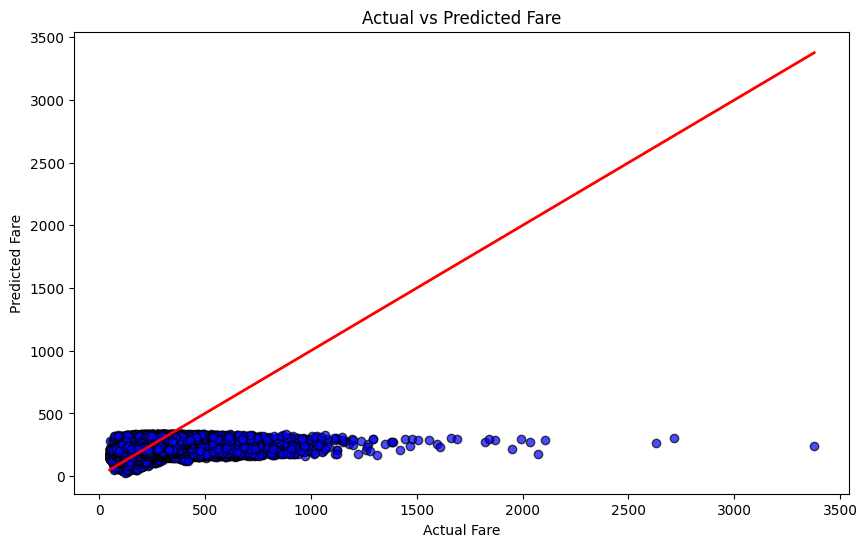

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define features and target variable
features = [ 'Year','quarter','citymarketid_1','citymarketid_2','airportid_1','airportid_2','nsmiles','passengers']
target = 'fare'

# Select features and target from the dataset
X = data[features]
y = data[target]

# Initialize and train the LinearRegression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate evaluation metrics
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()


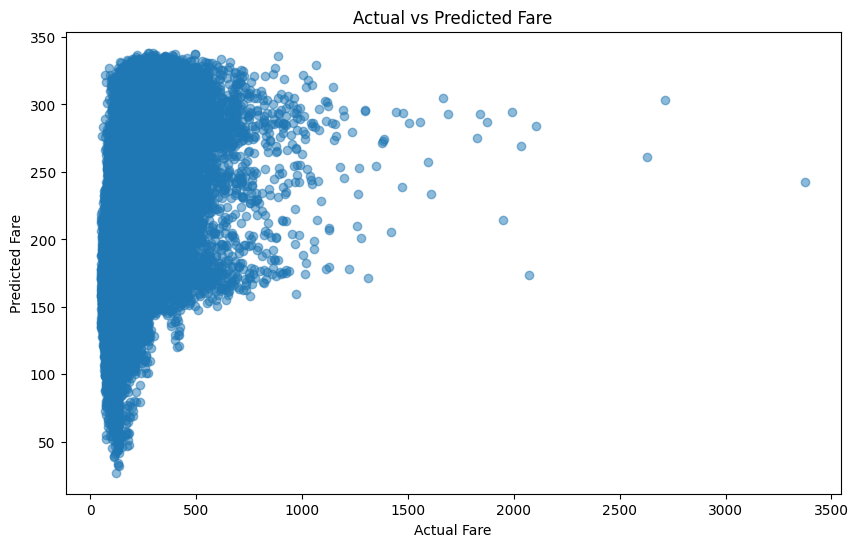

In [64]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.show()


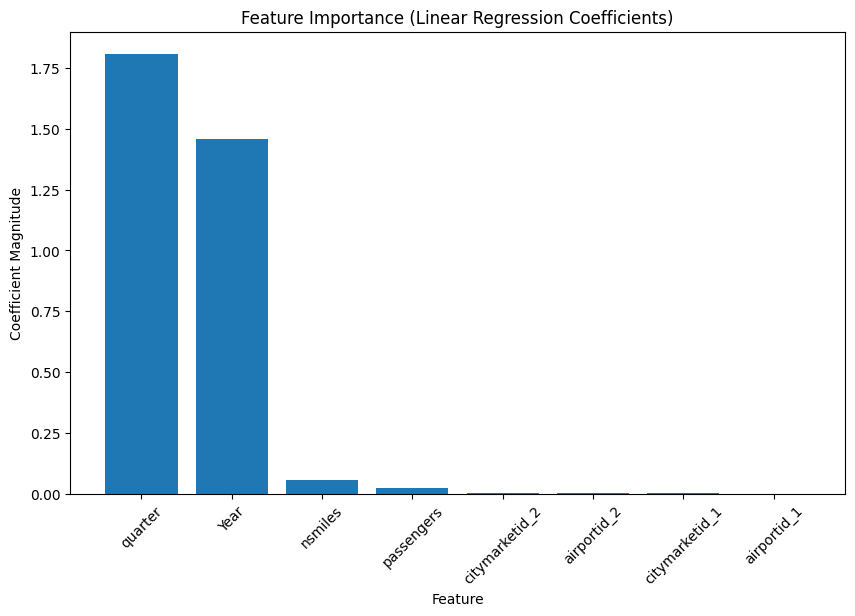

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the linear model
importances = np.abs(model.coef_)
indices = np.argsort(importances)[::-1]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


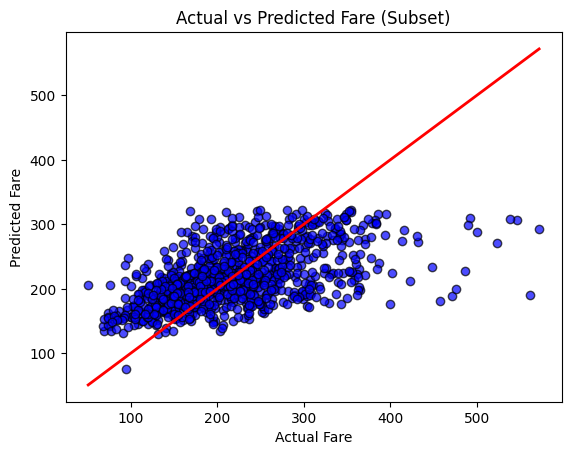

In [66]:
# Use a subset of the data for visualization
subset_indices = np.random.choice(len(X), 1000, replace=False)
subset_X = X.iloc[subset_indices]
subset_y = y.iloc[subset_indices]
subset_predictions = model.predict(subset_X)

# Plot with the subset
plt.scatter(subset_y, subset_predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(subset_y), max(subset_y)], [min(subset_y), max(subset_y)], color='red', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare (Subset)')
plt.show()


**Decision Tree**

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


# Define features and target variable
features = ['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'airportid_1', 'airportid_2', 'nsmiles', 'passengers']
target = 'fare'

# Select features and target from the dataset
X = data[features]
y = data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print the shapes of the input and predictions
print("Input shape:", X_test.shape)
print("Predictions shape:", predictions.shape)

# Optional: Print some predictions
print(predictions[:10])


Input shape: (49191, 8)
Predictions shape: (49191,)
[286.5  225.75 177.52 239.83 127.8  173.91 197.01 249.89 219.31 157.1 ]


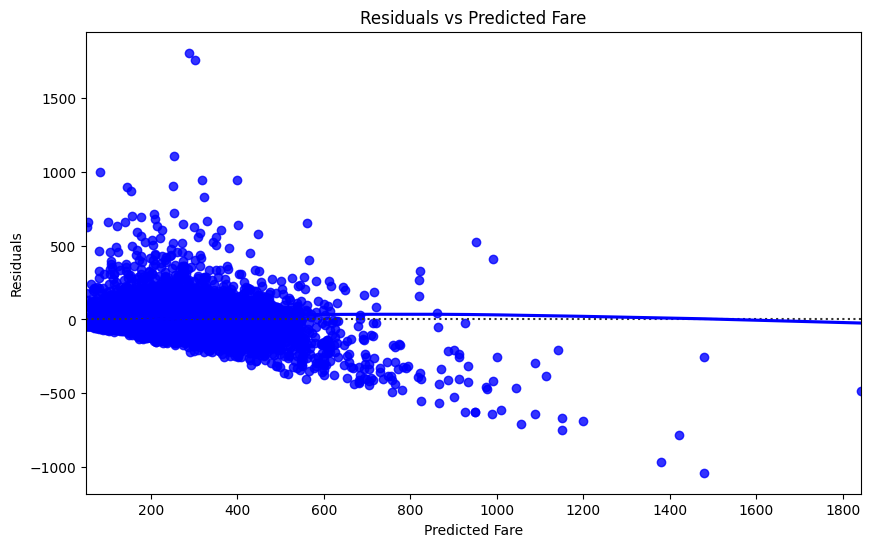

In [68]:
import seaborn as sns

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=y_test - predictions, lowess=True, color='blue')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Fare')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


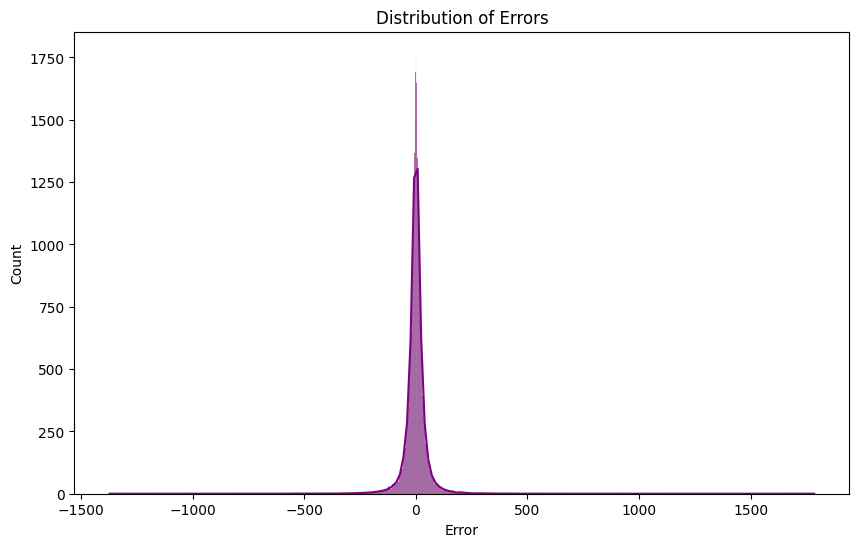

In [69]:
# Distribution of errors
plt.figure(figsize=(10, 6))
sns.histplot(y_test - predictions, kde=True, color='purple')
plt.xlabel('Error')
plt.title('Distribution of Errors')
plt.show()


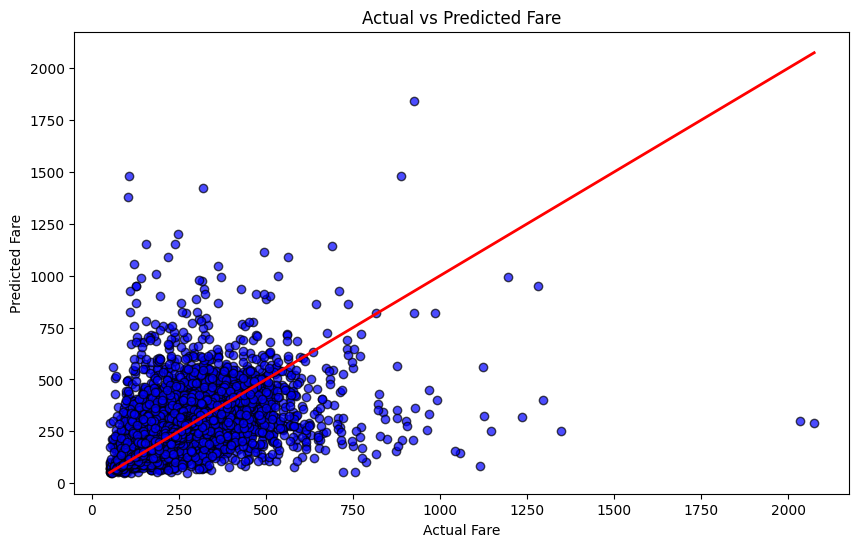

In [70]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()


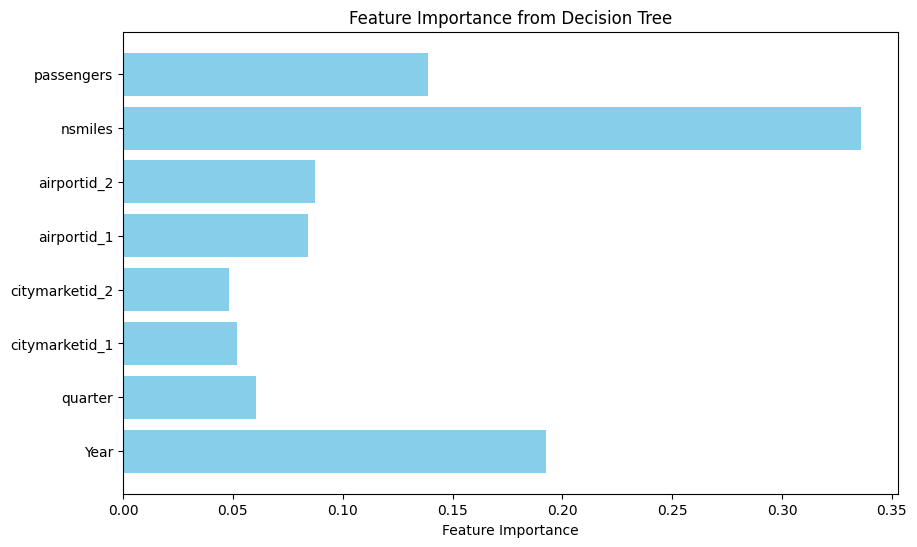

In [71]:
# Feature importance
features_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, features_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R² Score: 0.48782416346150004
Mean Absolute Error (MAE): 28.650219755646358
Mean Squared Error (MSE): 3389.134603451851
Root Mean Squared Error (RMSE): 58.21627438656523
